# Report

Install Dependencies

In [48]:
%pip install pandas
%pip install SQLAlchemy==1.4.46
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [50]:
# Read the table Salary into a Pandas dataframe
df = pd.read_sql_table('clean_salary', 'sqlite:///../data/clean_salary.sqlite')

In [51]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


What are the unique job titles in the data?

In [52]:
unique_job_titles = df['Job Title'].unique()
print("Unique Job Titles: ")
print(unique_job_titles)

Unique Job Titles: 
['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning'
 'Data Scientist - Quantitative' 'Digital Health Data Scientist'
 'Associate Data Analyst' 'Clinical Data Scientist'
 'Data Scientist / Machine Learning Expert' 'Web Data Analyst'
 'Senior Data Scientist' 'Data Engineer'
 'Data Scientist - Algorithms & Inference' 'Scientist'
 'Lead Data Scientist' 'Spectral Scientist/Engineer'
 'College Hire - Data Scientist - Open to December 2019 Graduates'
 'Data Scientist, Office of Data Science' 'Data Science Analyst'
 'Senior Risk Data Scientist'
 'Data Scientist in Artificial Intelligence Early Career'
 'Data Scientist - Research' 'R&D Data Analysis Scientist'
 'Analytics Consultant' 'Director, Data Science' 'Data Scientist SR'
 'R&D Sr Data Scientist' 'C

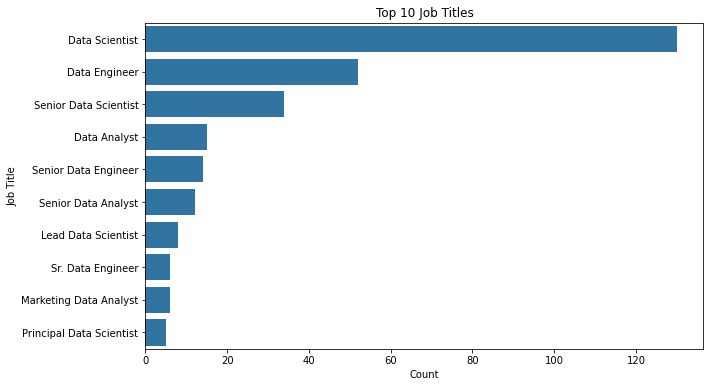

In [53]:
# Plotting
# Count the number of occurrences of each job title
job_title_counts = df['Job Title'].value_counts()

# Plot the top 10 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_counts.head(10), y=job_title_counts.head(10).index, orient='h')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

What are the different types of ownership and their counts?

In [54]:
ownership_counts = df['Type of ownership'].value_counts()
print("Ownership Types and Counts:")
print(ownership_counts)

Ownership Types and Counts:
Type of ownership
Company - Private                 402
Company - Public                  193
Nonprofit Organization             54
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  3
School / School District            2
Unknown                             1
Name: count, dtype: int64


What are the top five industries with the most job listings?

In [55]:
top_industries = df['Industry'].value_counts().head(5)
print("Top 5 Industries with the Most Job Listings:")
print(top_industries)

Top 5 Industries with the Most Job Listings:
Industry
Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: count, dtype: int64


Which sector has the highest average rating for companies?

In [56]:
highest_rated_sector = df.groupby('Sector')['Rating'].mean().idxmax()
print("Sector with Highest Average Rating:", highest_rated_sector)

highest_avg_rating = df.groupby('Sector')['Rating'].mean().max()
print(f"Highest Average Rating: {highest_avg_rating:.2f}")

Sector with Highest Average Rating: Agriculture & Forestry
Highest Average Rating: 4.60


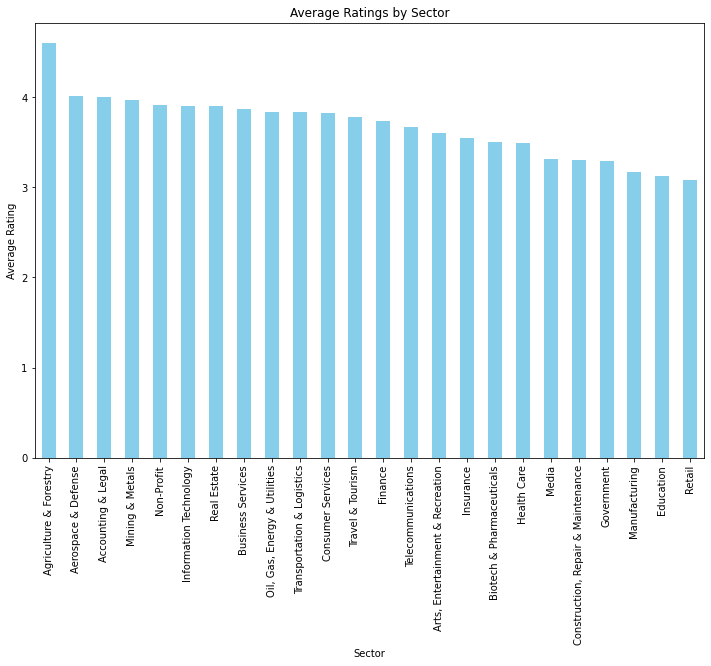

In [57]:
# Plotting
plt.figure(figsize=(12, 8))
df.groupby('Sector')['Rating'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Rating')
plt.show()

How is the revenue distributed among the companies?

In [58]:
revenue_distribution = df['Revenue'].value_counts()
print("Revenue Distribution:")
print(revenue_distribution)

Revenue Distribution:
Revenue
Unknown / Non-Applicable            195
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            3
Name: count, dtype: int64


What is top 10 locations with the most job listing?

In [59]:
top_locations = df['Location'].value_counts().head(10)
print("Top 5 Locations with the Most Job Listings:")
print(top_locations)

Top 5 Locations with the Most Job Listings:
Location
New York, NY         54
San Francisco, CA    48
Cambridge, MA        40
Chicago, IL          32
Boston, MA           23
San Jose, CA         13
Pittsburgh, PA       12
Washington, DC       11
Rockville, MD        11
Winston-Salem, NC    10
Name: count, dtype: int64
